In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


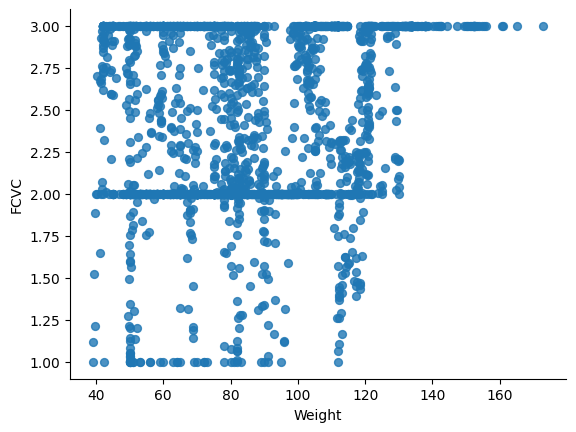

In [4]:
# @title Weight vs FCVC

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Weight', y='FCVC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

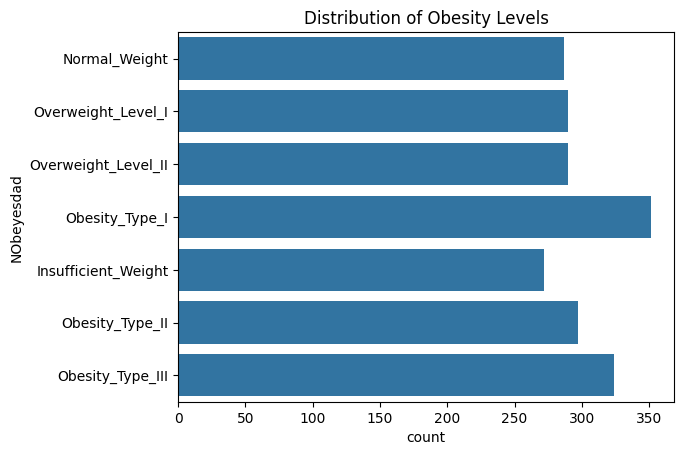

In [5]:
# Distribution of target variable
sns.countplot(y='NObeyesdad', data=data)
plt.title('Distribution of Obesity Levels')
plt.show()

In [6]:
# Checking for null values
print(data.isnull().sum())

print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

In [7]:
# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

In [8]:
continuous_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [11]:
data[continuous_columns]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FCVC'].plot(kind='hist', bins=20, title='FCVC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Weight', y='FCVC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='FCVC', y='NCP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['FCVC'].plot(kind='line', figsize=(8, 4), title='FCVC')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
